In [68]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier

In [69]:
data=pd.read_csv("heart_disease.csv")

In [70]:
data.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral in mg/dl            270 non-null    int64  
 5   fasting blood sugar > 120 mg/dl       270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   maximum heart rate achieved           270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  slope of peak                         270 non-null    int64  
 11  number of major ves

In [72]:
data.groupby(["Disease"]).count()

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal
Disease,,,,,,,,,,,,,
0,150,150,150,150,150,150,150,150,150,150,150,150,150
1,120,120,120,120,120,120,120,120,120,120,120,120,120


In [73]:
data_plot=data[["age","resting blood pressure","serum cholestoral in mg/dl      ","maximum heart rate achieved  ","oldpeak ","Disease"]]
#continous verileri görselleştirmek için ayırma

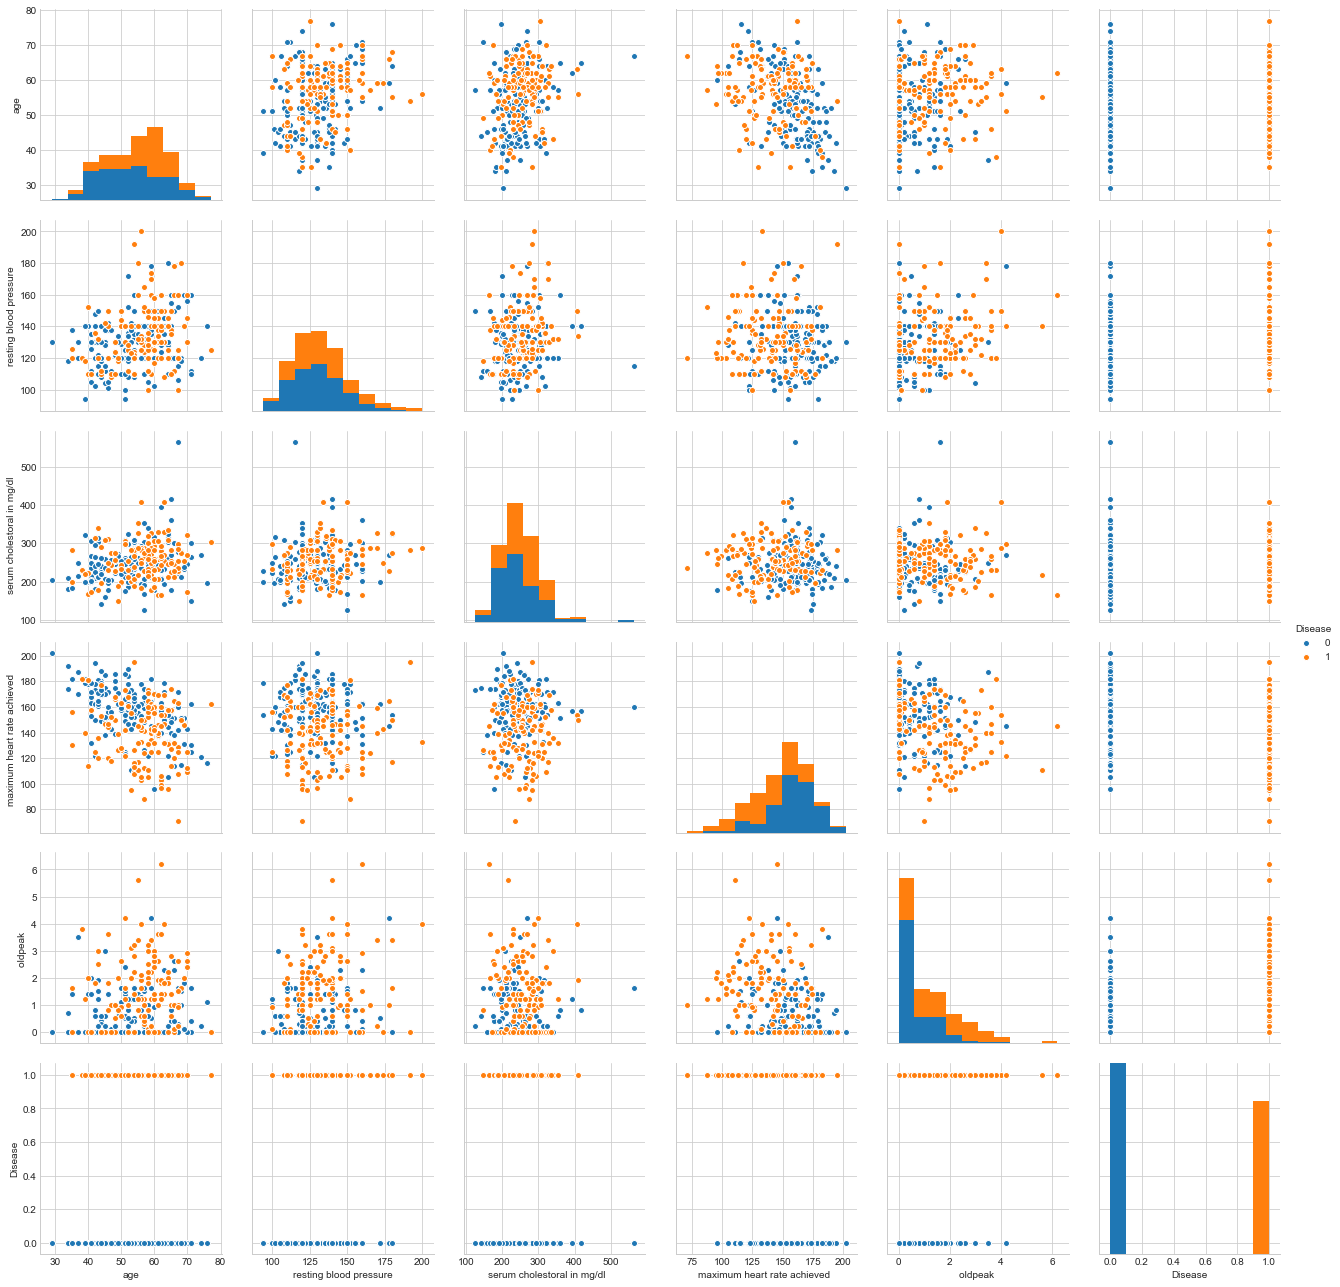

In [74]:
sns.set_style("whitegrid");
sns.pairplot(data_plot, hue="Disease", size=3);
plt.show()

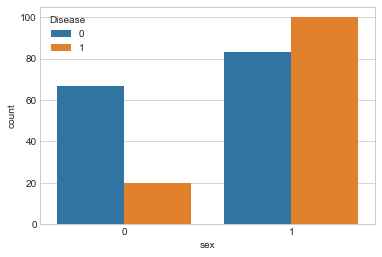

In [75]:
#sayısallaştırılmış ama kategorik olan veriler
sns.countplot(x="sex", hue='Disease', data=data)

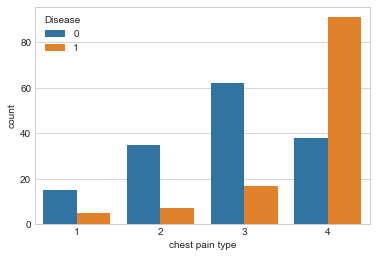

In [76]:
sns.countplot(x="chest pain type", hue='Disease', data=data)

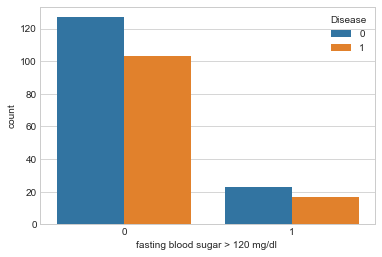

In [77]:
sns.countplot(x="fasting blood sugar > 120 mg/dl ", hue='Disease', data=data)

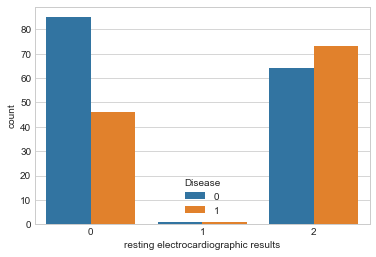

In [78]:
sns.countplot(x="resting electrocardiographic results", hue='Disease', data=data)

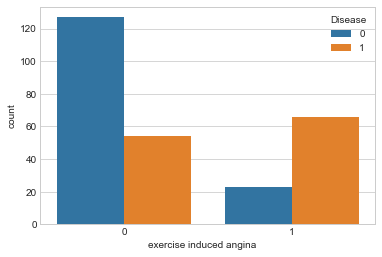

In [79]:
sns.countplot(x="exercise induced angina    ", hue='Disease', data=data)

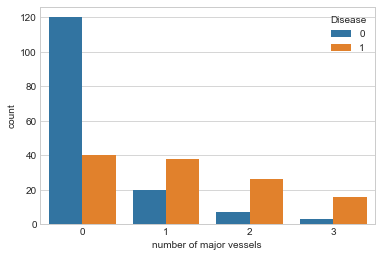

In [80]:
sns.countplot(x="number of major vessels ", hue='Disease', data=data)

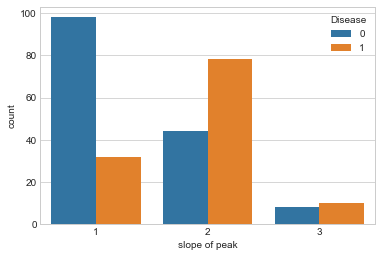

In [81]:
sns.countplot(x="slope of peak", hue='Disease', data=data)

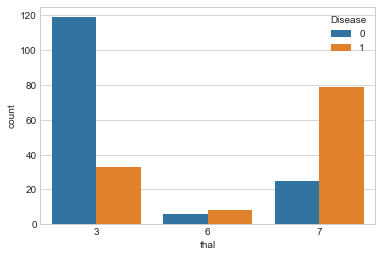

In [82]:
sns.countplot(x="thal", hue='Disease', data=data)

In [83]:
y=data.Disease

In [84]:
x=data.drop(["Disease"],axis=1)

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (216, 13)
x test:  (54, 13)
y train:  (216,)
y test:  (54,)


In [86]:
#dağılımlar çok farklı olduğu için min-max scaler kullandım
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [87]:
def model(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print("train score",model.score(x_train,y_train) )
    print("test score" , model.score(x_test,y_test))
    print(classification_report(y_test,pred))

In [88]:
knn=KNeighborsClassifier(n_neighbors=7)#komşu sayısı için parameter kullandım
model(knn)

train score 0.8518518518518519
test score 0.7962962962962963
             precision    recall  f1-score   support

          0       0.83      0.80      0.81        30
          1       0.76      0.79      0.78        24

avg / total       0.80      0.80      0.80        54



In [89]:
knn=KNeighborsClassifier(n_neighbors=5)
model(knn)#en iyi sonuç bunun için geliyor, fakat veri sayısı yetersiz kalıyor

train score 0.8425925925925926
test score 0.8333333333333334
             precision    recall  f1-score   support

          0       0.86      0.83      0.85        30
          1       0.80      0.83      0.82        24

avg / total       0.83      0.83      0.83        54



In [90]:
knn=KNeighborsClassifier(n_neighbors=3)
model(knn)

train score 0.8842592592592593
test score 0.7962962962962963
             precision    recall  f1-score   support

          0       0.88      0.73      0.80        30
          1       0.72      0.88      0.79        24

avg / total       0.81      0.80      0.80        54



In [91]:
knn=KNeighborsClassifier(n_neighbors=9)
model(knn)

train score 0.8611111111111112
test score 0.7777777777777778
             precision    recall  f1-score   support

          0       0.80      0.80      0.80        30
          1       0.75      0.75      0.75        24

avg / total       0.78      0.78      0.78        54



In [92]:
knn=KNeighborsClassifier(n_neighbors=1)
model(knn)

train score 1.0
test score 0.7407407407407407
             precision    recall  f1-score   support

          0       0.81      0.70      0.75        30
          1       0.68      0.79      0.73        24

avg / total       0.75      0.74      0.74        54

